# Data Analysis and Visualization

## Exploratory Data Analysis

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/XXloveBubbleTea/1stsemester/main/DMP.csv')

df.shape
df.head()

,project_id,project_status,project_name,street_number,street_name,street_type,zip_code,block,lot,city_analysis_neighborhood,...,disabled_units,losp_units,public_housing_replacement_units,latitude,longitude,location,estimated_construction_completion,bedrooms_to_be_determined,project_owner,project_co_sponsor
0,2015-033c,(5) First Construction Document Issued,Sunnydale Block 3A,NaN,NaN,NaN,94134.0,NaN,NaN,Visitacion Valley,...,0,0,60,37.712051,-122.416467,"{\n ""location"": {\n ""latitude"": ""37.712050...",2025-04-01T00:00:00.000,NaN,Mercy Housing CA,Mercy Housing CA
1,2012-001f,(2) Predevelopment Feasibility,Alice Griffith Phase 5 (Blocks 14 & 15),NaN,NaN,NaN,94124.0,NaN,NaN,Bayview Hunters Point,...,0,0,30,37.718764,-122.387737,"{\n ""location"": {\n ""latitude"": ""37.718764...",2025-12-01T00:00:00.000,NaN,NaN,NaN
2,2015-033d,(3) Design with Entitlements Approved,Sunnydale Block 7,NaN,NaN,NaN,NaN,NaN,NaN,Visitacion Valley,...,0,0,0,NaN,NaN,"{\n ""location"": null\n}",2025-09-01T00:00:00.000,NaN,NaN,NaN
3,2012-001g,(2) Predevelopment Feasibility,Alice Griffith Phase 6 (Block 9),NaN,NaN,NaN,94124.0,NaN,NaN,Bayview Hunters Point,...,0,0,0,37.718813,-122.386751,"{\n ""location"": {\n ""latitude"": ""37.718812...",2025-12-01T00:00:00.000,NaN,Entity to be formed,NaN
4,2015-033f,(5) First Construction Document Issued,Sunnydale Block 3B,NaN,NaN,NaN,94134.0,NaN,NaN,Visitacion Valley,...,0,0,67,37.712051,-122.416467,"{\n ""location"": {\n ""latitude"": ""37.712050...",2025-01-01T00:00:00.000,NaN,Mercy Housing CA,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   project_id                                276 non-null    object 
 1   project_status                            276 non-null    object 
 2   project_name                              276 non-null    object 
 3   street_number                             231 non-null    object 
 4   street_name                               231 non-null    object 
 5   street_type                               226 non-null    object 
 6   zip_code                                  270 non-null    float64
 7   block                                     225 non-null    object 
 8   lot                                       225 non-null    object 
 9   city_analysis_neighborhood                276 non-null    object 
 10  planning_neighborhood                 

In [3]:
df.duplicated().sum()

0

In [4]:
df['longitude'].isna()

0      False
1      False
2       True
3      False
4      False
       ...  
271    False
272    False
273    False
274    False
275    False
Name: longitude, Length: 276, dtype: bool

In [5]:
# deleting 7 rows with null values and one row with 0 lat and long
df_lng_lat=df[['latitude','longitude','affordable_units']]
df_2=df_lng_lat.dropna()
df_2=df_2[df_2.latitude!=0]

In [6]:
df["estimated_construction_completion"].unique()

array(['2025-04-01T00:00:00.000', '2025-12-01T00:00:00.000',
       '2025-09-01T00:00:00.000', '2025-01-01T00:00:00.000',
       '2024-12-01T00:00:00.000', nan, '2024-09-01T00:00:00.000',
       '2024-06-28T00:00:00.000', '2022-12-23T00:00:00.000',
       '2020-02-01T00:00:00.000', '2023-09-01T00:00:00.000',
       '2023-12-23T00:00:00.000', '1930-12-22T00:00:00.000',
       '2026-06-01T00:00:00.000', '2022-01-01T00:00:00.000',
       '2026-09-15T00:00:00.000', '2023-12-01T00:00:00.000',
       '2029-06-23T00:00:00.000', '2026-05-15T00:00:00.000',
       '2019-06-30T00:00:00.000', '2026-01-15T00:00:00.000',
       '2022-06-01T00:00:00.000', '2027-06-24T00:00:00.000',
       '2024-01-29T00:00:00.000', '2026-04-24T00:00:00.000',
       '2024-06-30T00:00:00.000', '2027-10-01T00:00:00.000',
       '2024-02-15T00:00:00.000', '2023-05-16T00:00:00.000',
       '2024-02-04T00:00:00.000', '2025-11-30T00:00:00.000',
       '2025-11-11T00:00:00.000', '2025-03-01T00:00:00.000',
       '2025-12-30T

In [7]:
# changing the type of estimated_construction_completion column to datetime
df["estimated_construction_completion"]=pd.to_datetime(df["estimated_construction_completion"], dayfirst=False)

In [8]:
# deleting the row which has an outlier for estimated_construction_completion column
df[df["estimated_construction_completion"]=='1930-12-22']
df.drop(35,axis=0,inplace=True)

## Visualizations

### Visualization #1 : providing visual representation of affordable housing projects in San Francisco

In [9]:
import folium
df_2 = df[df['affordable_units'] > 200] # you can filter the projects with specific number of affordable units
locations = df_2[['latitude', 'longitude']].values.tolist()
m = folium.Map(location=locations[0], zoom_start=12)
for loc in locations:
  folium.Marker(location=loc, popup=f"Latitude:{loc[0]}, Longitude: {loc[1]}").add_to(m)
m

### Visualization #2: Distribution of project sizes (under 500 units)

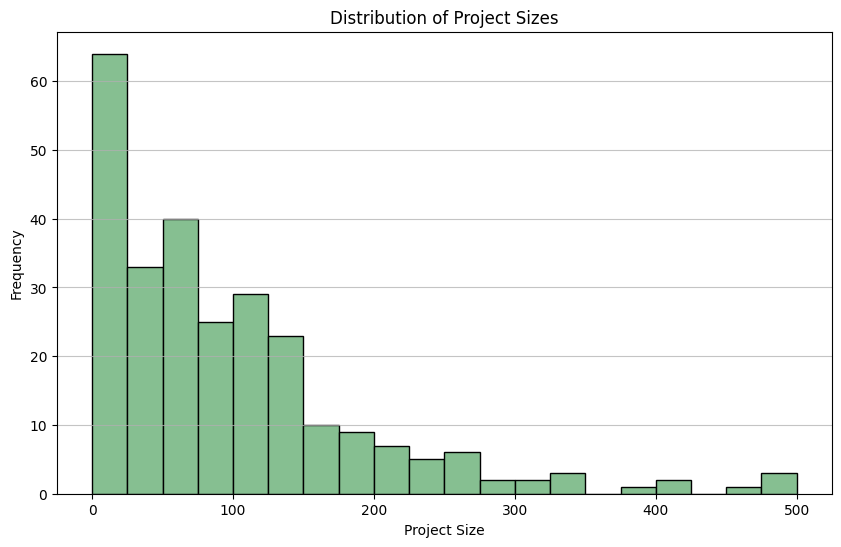

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.hist(df['project_units'], bins=20, range=(0, 500), color='#86bf91', edgecolor='black')
plt.title('Distribution of Project Sizes')
plt.xlabel('Project Size')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Visualization #3: Using Pie chart for visualizing the distribution of affordable housing projects based on their size

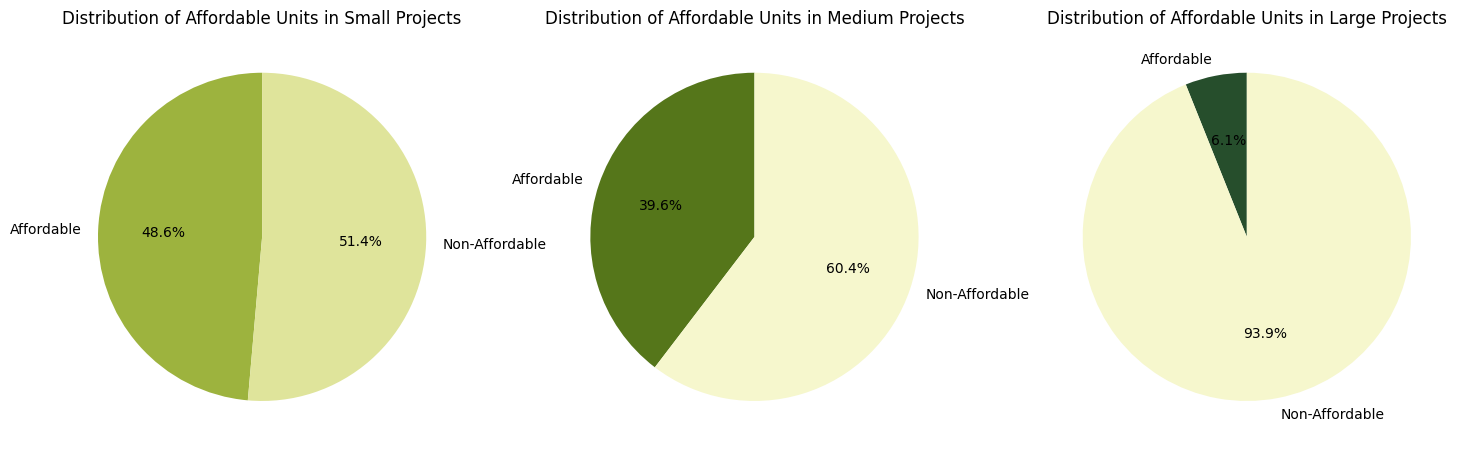

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df['affordable_ratio'] = df['affordable_units'] / df['project_units']

bins_size = [0, 100, 500, np.inf]
labels_size = ['Small', 'Medium', 'Large']
colors_affordable = ['#9db33e', '#55761a', '#264e2c']
colors_non_affordable = ['#dfe49b', '#f6f7cd', '#f6f7cd']

df['size_category'] = pd.cut(df['project_units'], bins=bins_size, labels=labels_size)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, size_category in enumerate(labels_size):
    subset_df = df[df['size_category'] == size_category]
    sizes_affordable = subset_df['affordable_units'].sum()
    sizes_non_affordable = subset_df['project_units'].sum() - sizes_affordable
    sizes = [sizes_affordable, sizes_non_affordable]
    labels = ['Affordable', 'Non-Affordable']
    colors = [colors_affordable[i], colors_non_affordable[i]]

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Distribution of Affordable Units in {size_category} Projects')

plt.show()

This visualization creates a ratio as a normalized measure that indicates the affordability of housing in each project, where 0 represents no affordable housing, and 1 represents entirely affordable housing. Projects with values in between indicate varying degrees of affordability. The size of each data point also fluctates based on the overall size of all available unit types the housing project offers.

### Visualization #4: Using Stacked bar to visualize the priority areas of San Francisco's Mayor in providing affordable housing units

In [ ]:
# creating new dataframe in order to visualize Comparing division of affordable units from 2022 to 2027
Division_df=df.filter(['affordable_units','family_units', 'senior_units', 'tay_units', 'homeless_units','sro_units',
       'disabled_units','estimated_construction_completion'])
Division_df['Year'] = Division_df['estimated_construction_completion'].dt.year
bahar_sum=Division_df.groupby('Year')['family_units', 'senior_units', 'tay_units', 'homeless_units',
       'disabled_units']
Division_sum=Division_df.set_index('estimated_construction_completion').resample('Y')['affordable_units','family_units', 'senior_units', 'homeless_units',
       'disabled_units','sro_units'].sum().reset_index()
Division_sum['estimated_construction_completion'] = Division_sum['estimated_construction_completion'].dt.year
Division_sum=Division_sum[3:9]

<ipython-input-13-94faa425964d>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bahar_sum=Division_df.groupby('Year')['family_units', 'senior_units', 'tay_units', 'homeless_units',


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=Division_sum['estimated_construction_completion'], y=Division_sum['family_units'], name='family_units', marker_color='#264e2c'))
fig.add_trace(go.Bar(x=Division_sum['estimated_construction_completion'], y=Division_sum['senior_units'], name='senior_units', marker_color='#55761a'))
fig.add_trace(go.Bar(x=Division_sum['estimated_construction_completion'], y=Division_sum['homeless_units'], name='homeless_units', marker_color='#9db33e'))
fig.add_trace(go.Bar(x=Division_sum['estimated_construction_completion'], y=Division_sum['disabled_units'], name='disabled_units', marker_color='#dfe49b'))

fig.update_layout(barmode='stack', title='Comparing division of affordable units from 2022 to 2027', xaxis=dict(tickmode='linear', dtick=1))

fig.update_layout(xaxis_title='Year',
    yaxis_title='Number of Units',title_x=0.45)
fig.show()

### Visulization #5: Using bubble geo map to visualize the location of affordable housing project and the ratio of affordability of that project at the same time

In [ ]:
import pandas as pd
import folium

df = pd.read_csv('https://raw.githubusercontent.com/XXloveBubbleTea/1stsemester/main/DMP.csv')

df_sf = df[(df['latitude'] >= 37) & (df['latitude'] <= 38) & (df['longitude'] >= -123) & (df['longitude'] <= -122)].copy()

df_sf['affordable_ratio'] = df_sf['affordable_units'] / df_sf['project_units']

df_sf['affordable_ratio'].fillna(0, inplace=True)

color_scheme = ['#eef0a1', '#eaec8b', '#9db33e', '#55761a', '#264e2c']

max_circle_size = 15

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

for _, row in df_sf.iterrows():
    color = color_scheme[int(row['affordable_ratio'] * (len(color_scheme) - 1))]
    circle_size = min(row['project_units'] / 10, max_circle_size)
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=circle_size,
                        popup=f"Latitude: {row['latitude']}, Longitude: {row['longitude']}<br>Affordable Ratio: {row['affordable_ratio']:.2f}",
                        color=color,
                        fill=True,
                        fill_color=color).add_to(m)

legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 130px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">
     &nbsp; <strong>Affordable Ratio</strong> <br>
     &nbsp; <i class="fa fa-circle" style="color: #264e2c"></i> 0.8-1.0<br>
     &nbsp; <i class="fa fa-circle" style="color: #55761a"></i> 0.6-0.8<br>
     &nbsp; <i class="fa fa-circle" style="color: #9db33e"></i> 0.4-0.6<br>
     &nbsp; <i class="fa fa-circle" style="color: #eaec8b"></i> 0.2-0.4<br>
     &nbsp; <i class="fa fa-circle" style="color: #eef0a1"></i> 0-0.2<br>
     </div>
     """
m.get_root().html.add_child(folium.Element(legend_html))

m



## Animated Visualizations

### Animation #1: Evaluation Of housing type in San Francisco over time

In [ ]:
# Checking for columns related to the type of housing unit and year
housing_type_columns = [col for col in df.columns if 'units' in col.lower() or 'housing' in col.lower()]
year_column = 'Start Year'
# Displaying the housing type columns for review
housing_type_columns

['housing_tenure',
 'project_units',
 'affordable_units',
 'market_rate_units',
 'sro_units',
 'studio_units',
 '_1bd_units',
 '_2bd_units',
 '_3bd_units',
 '_4bd_units',
 '_5_bd_units',
 'mobility_units',
 'manager_units',
 'family_units',
 'senior_units',
 'tay_units',
 'homeless_units',
 'disabled_units',
 'losp_units',
 'public_housing_replacement_units']

In [ ]:
import pandas as pd

# Convert 'Estimated/Actual Construction Start Date' to datetime and extract the year
df['Start Year'] = pd.to_datetime(df['estimated_actual_construction_start_date'], errors='coerce').dt.year

# Define the selected housing types
selected_housing_types = ['affordable_units', 'family_units', 'senior_units', 'homeless_units', 'disabled_units']

# Resetting the data list for animation
animation_data = []

# For each housing type, we extract the year, the count of units, and label the housing type
for housing_type in selected_housing_types:
    # Extracting relevant data for each housing type
    temp_df = df[['Start Year', housing_type]].copy()
    temp_df['Housing Type'] = housing_type
    temp_df.rename(columns={housing_type: 'Unit Count'}, inplace=True)
    temp_df = temp_df.dropna(subset=['Unit Count'])  # Dropping NaN values in 'Unit Count'

    # Appending to the list
    animation_data.append(temp_df)

# Combining the data from all housing types
animation_df = pd.concat(animation_data)

# Checking the prepared data
print(animation_df.head())

   Start Year  Unit Count      Housing Type
0      2023.0          79  affordable_units
1      2024.0          35  affordable_units
2      2023.0          80  affordable_units
3      2024.0         130  affordable_units
4      2023.0          89  affordable_units


In [ ]:
import plotly.express as px

# Assuming 'df' is your original DataFrame and it contains a 'Project Units' column
# Also assuming 'selected_housing_types' contains your chosen housing types

# Resetting the data list for animation
animation_data = []

# For each housing type, extract the year, the count of units, and label the housing type
df['Start Year'] = pd.to_datetime(df['estimated_actual_construction_start_date'], errors='coerce').dt.year

# Define the selected housing types (excluding 'Family Units' and including 'Project Units')
selected_housing_types = ['affordable_units', 'senior_units', 'homeless_units', 'disabled_units', 'project_units']


# For each housing type, extract the year, the count of units, and label the housing type
for housing_type in selected_housing_types:
    # Extracting relevant data for each housing type
    temp_df = df[['Start Year', housing_type]].copy()
    temp_df['Housing Type'] = housing_type
    temp_df.rename(columns={housing_type: 'Unit Count'}, inplace=True)
    temp_df = temp_df.dropna(subset=['Unit Count', 'Start Year'])  # Dropping NaN values

    # Appending to the list
    animation_data.append(temp_df)

# Combining the data from all housing types
animation_df = pd.concat(animation_data)

# Convert 'Start Year' to integer for proper sorting
animation_df['Start Year'] = animation_df['Start Year'].astype(int)

# Sort the DataFrame by 'Start Year'
animation_df = animation_df.sort_values(by='Start Year')

# Define Color Palette #4235
palette_4235 = ['#264e2c', '#55761a', '#9db33e', '#dfe49b', '#f6f7cd']

# Create the bar chart animation
fig = px.bar(
    animation_df,
    x='Unit Count',
    y='Housing Type',
    color='Housing Type',
    color_discrete_sequence=palette_4235,
    animation_frame='Start Year',
    range_x=[0, animation_df['Unit Count'].max() + 50],
    title='Evolution of Housing Types in San Francisco Over Time'
)

# Updating layout for better readability
fig.update_layout(
    xaxis_title='Number of Units',
    yaxis_title='Housing Type',
    showlegend=False
)

fig.show()

### Animation #2: Agencies contribution in the construction of affordable units from 2020 to 2027


In [ ]:
# define a new dataframe for the projects which are led by OCII agency
df_1=df[(df['lead_agency']=='OCII')]
new_df_1=df_1.filter(['lead_agency','affordable_units','estimated_construction_completion'])
new_df_1["estimated_construction_completion"]=pd.to_datetime(new_df_1["estimated_construction_completion"], dayfirst=False)
#new_df_1.drop(35,axis=0,inplace=True)
Y=new_df_1.set_index('estimated_construction_completion').resample('Y')['affordable_units'].sum()
Y=pd.DataFrame(Y)
Y['lead_agency']='OCII'
Y=Y[:-2]
print(Y)

                                   affordable_units lead_agency
estimated_construction_completion                              
2020-12-31                                       76        OCII
2021-12-31                                        0        OCII
2022-12-31                                        6        OCII
2023-12-31                                       56        OCII
2024-12-31                                        0        OCII
2025-12-31                                      293        OCII
2026-12-31                                      332        OCII
2027-12-31                                      411        OCII


In [ ]:
# define a new dataframe for the projects which are led by MOHCD agency
df_1=df[(df['lead_agency']=='MOHCD')]
new_df_1=df_1.filter(['lead_agency','affordable_units','estimated_construction_completion'])
X=new_df_1.set_index('estimated_construction_completion').resample('Y')['affordable_units'].sum()
X=pd.DataFrame(X)
X['lead_agency']='MOHCD'
X=X[1:]
print(X)

                                   affordable_units lead_agency
estimated_construction_completion                              
2020-12-31                                        0       MOHCD
2021-12-31                                        0       MOHCD
2022-12-31                                      265       MOHCD
2023-12-31                                       39       MOHCD
2024-12-31                                      704       MOHCD
2025-12-31                                      538       MOHCD
2026-12-31                                      434       MOHCD
2027-12-31                                       86       MOHCD


In [ ]:
# define a new dataframe for the projects which are led by MOHCD/SFRA agency and adding some rows with zero value for affordable units
# to make this dataframe compatible with 2 previous ones to make a animation of them.
from itertools import zip_longest
from datetime import datetime

df_1=df[(df['lead_agency']=='MOHCD/SFRA')]
new_df_1=df_1.filter(['lead_agency','affordable_units','estimated_construction_completion'])
Z=new_df_1.set_index('estimated_construction_completion').resample('Y')['affordable_units'].sum()
Z=pd.DataFrame(Z)
Z['lead_agency']='MOHCD/SFRA'

row_2 = [ 0, 'MOHCD/SFRA']
row_3 = [ 0, 'MOHCD/SFRA']
row_4 = [ 0, 'MOHCD/SFRA']
row_5 = [0, 'MOHCD/SFRA']

Z.loc['2020-12-31'] = row_2
Z.loc['2021-12-31'] = row_3
Z.loc['2026-12-31'] = row_4
Z.loc['2027-12-31'] = row_5
print(Z)

                                   affordable_units lead_agency
estimated_construction_completion                              
2022-12-31 00:00:00                              49  MOHCD/SFRA
2023-12-31 00:00:00                             134  MOHCD/SFRA
2024-12-31 00:00:00                               0  MOHCD/SFRA
2025-12-31 00:00:00                              57  MOHCD/SFRA
2020-12-31                                        0  MOHCD/SFRA
2021-12-31                                        0  MOHCD/SFRA
2026-12-31                                        0  MOHCD/SFRA
2027-12-31                                        0  MOHCD/SFRA


In [ ]:
# creating new dataframe from concatinating three prevoius ones in order to make an animated visualization
import pandas as pd
new_one=pd.concat([X, Y,Z], ignore_index=False, axis=0).reset_index()
new_one['Year'] = new_one['estimated_construction_completion'].dt.year
new_one['month'] = new_one['estimated_construction_completion'].dt.month
new_one['DATE'] = pd.to_datetime(new_one[['Year', 'month']].assign(DAY=1))
pd.to_datetime(new_one['DATE']).apply(lambda x: x.date())
new_one.head()


<ipython-input-33-7c3722f13750>:3: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])



,estimated_construction_completion,affordable_units,lead_agency,Year,month,DATE
0,2020-12-31,0,MOHCD,2020,12,2020-12-01
1,2021-12-31,0,MOHCD,2021,12,2021-12-01
2,2022-12-31,265,MOHCD,2022,12,2022-12-01
3,2023-12-31,39,MOHCD,2023,12,2023-12-01
4,2024-12-31,704,MOHCD,2024,12,2024-12-01


In [ ]:
import plotly.express as px

custom_colors = {'MOHCD': '#264e2c', 'MOHCD/SFRA': '#dfe49b', 'OCII': '#55761a'}

fig = px.bar(new_one,
             x="lead_agency",
             y="affordable_units",
             color="lead_agency",
             animation_frame="Year",
             title='Agencies contribution in the construction of affordable units from 2020 to 2027',
             range_y=[0, 750],
             color_discrete_map=custom_colors)

fig.update_layout(updatemenus=[dict(type='buttons',
                                    showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None,
                                                        dict(frame=dict(duration=1000, redraw=True),
                                                             fromcurrent=True)]),
                                             dict(label='Pause',
                                                  method='animate',
                                                  args=[[None], dict(frame=dict(duration=0, redraw=True),
                                                                     mode='immediate')])])])
fig.update_layout(title_x=0.45)
fig.show()